**Statistiques Inférentielles avec Python**

---



In [2]:
# Importer de différentes librairies et bibliothèques

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_1samp
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import pearsonr

In [3]:
# Connecter mon Google Drive à ma session actuelle sur Google Colab
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import os

In [5]:
# Listing des fichiers contenus dans le dossier de travail sur Google Drive
os.listdir('/gdrive/MyDrive/Colab_Notebooks')

['Python Test.ipynb', 'Poids-Taille-imc.csv', 'Stat_Descriptive.ipynb']

In [6]:
# Importer le jeu de données et prévisualisation des 5 premières lignes des données
df= pd.read_csv('/gdrive/MyDrive/Colab_Notebooks/Poids-Taille-imc.csv', encoding='latin-1')
df.head(5)

,Genre,Taille,Poids,IMC
0,Homme,1.875714,109.720985,Obèse
1,Homme,1.747060,73.622732,Normal
2,Homme,1.882397,96.497550,Surpoids
3,Homme,1.821967,99.809504,Obèse
4,Homme,1.774998,93.598619,Surpoids


In [7]:
# Vérifier s'il existe des doublons dans le jeu de données
df.nunique()

Genre         2
Taille    10000
Poids     10000
IMC           4
dtype: int64

*1. Test d'une variable quantitative*

---



In [9]:
# Calcul de la moyenne arithmétique
df['Taille'].mean()

1.6857360177711003

**A. Test statistique (T-Test) :**
Verifier si la moyenne de la taille de notre échantillon permet de conclure sur celle de la population. De ce fait, nous éméttons l'hypothèse Nulle (Ho) selon laquelle la taille a une distribution normale.

In [13]:
tset, pval = ttest_1samp(df['Taille'], 1.685)

print("La p-value est égale à",pval)

if pval < 0.05:    # alpha = 5% soit 0,05
   print("Ho est rejetée")
else:
   print("Ho est maintenue")

La p-value est égale à 0.4513865773843392
Ho est maintenue


**B. Test de Fisher :**
Vérification d'existence d'une correlation entre une variable quantitative (Poids) et qualitative (IMC). De ce fait, nous éméttons l'hypothèse Nulle (Ho) selon laquelle la taille a une distribution normale.

In [15]:
#ANOVA (F-TEST)
df_anova = pd.read_csv('/gdrive/MyDrive/Colab_Notebooks/Poids-Taille-imc.csv', encoding='latin-1')
df_anova = df_anova[['Poids','IMC']]
grps = pd.unique(df_anova.IMC.values)
print(grps)
d_data = {grp:df_anova['Poids'][df_anova.IMC == grp] for grp in grps}
print(d_data)

['Obèse' 'Normal' 'Surpoids' 'Sous-poids']
{'Obèse': 0       109.720985
3        99.809504
33       93.069649
59       95.039544
78       89.108085
           ...    
4846     87.489569
4861    102.504845
4869    102.229925
4968     85.892814
4997     90.353440
Name: Poids, Length: 255, dtype: float64, 'Normal': 1       73.622732
5       69.042216
22      67.663936
24      73.484921
29      70.008586
          ...    
9994    50.135381
9995    62.041159
9997    58.275377
9998    74.322166
9999    51.550324
Name: Poids, Length: 4114, dtype: float64, 'Surpoids': 2       96.497550
4       93.598619
6       83.428219
7       76.190352
8       79.800187
          ...    
9981    61.488655
9982    80.735777
9985    77.343883
9992    62.909437
9996    77.504315
Name: Poids, Length: 5589, dtype: float64, 'Sous-poids': 5009    47.242314
5191    41.153749
5214    38.098588
5360    31.289924
5394    42.743031
5605    41.747675
5655    41.174682
5740    36.528335
5883    39.412932
6269    41.75000

In [16]:
F, p = f_oneway(d_data['Obèse'], d_data['Normal'], d_data['Surpoids'],d_data['Sous-poids'])
print("La p-value est égale à", p)
if p < 0.05:
    print("Ho est rejetée")
else:
    print("Ho est maintenue")

La p-value est égale à 0.0
Ho est rejetée


**C. CHI 2 :**
Vérification d'existence d'une correlation entre deux variables qualitatives (Genre et IMC). De ce fait, nous éméttons l'hypothèse Nulle (Ho) selon laquelle il n'existe aucune relation entre le genre et l'IMC.

In [27]:
contingency_table=pd.crosstab(df["Genre"],df["IMC"])
print('Table de contingence :\n',contingency_table)

Table de contingence :
 IMC    Normal  Obèse  Sous-poids  Surpoids
Genre                                     
Femme    3887      0          42      1071
Homme     227    255           0      4518


In [47]:
# calcul des valeurs pour le Test Chi 2.
c, p, dof, expected = chi2_contingency(contingency_table)

# Présenter la p-value
print('la p-value est égale à ', p)
if p < 0.05:
    print("Ho est rejetée. Il existe ainsi une relation entre le genre et l'IMC")
else:
    print("Ho est maintenue")

la p-value est égale à  0.0
Ho est rejetée. Il existe ainsi une relation entre le genre et l'IMC


In [34]:
#Valeurs observées
Observed_Values = contingency_table.values
print("Valeurs observées : \n",Observed_Values)

Valeurs observées : 
 [[3887    0   42 1071]
 [ 227  255    0 4518]]


In [35]:
#Valeurs attendues
b=chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Valeurs attendues :-\n",Expected_Values)

Valeurs attendues :-
 [[2057.   127.5   21.  2794.5]
 [2057.   127.5   21.  2794.5]]


In [39]:
# Calcul du degré de liberté du tableau
no_of_rows=len(contingency_table.iloc[:,0])
no_of_columns=len(contingency_table.iloc[0,:])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degré de Liberté est égale à",ddof)

Degré de Liberté est égale à 3


**D. Tests de Pearson :**
Vérification d'existence d'une correlation entre deux variables quantitatives (Taille et Poids). De ce fait, nous éméttons l'hypothèse Nulle (Ho) selon laquelle il n'existe aucune relation entre la Taille et le Poids.

Text(0.5, 1.0, 'Poids vs Taille')

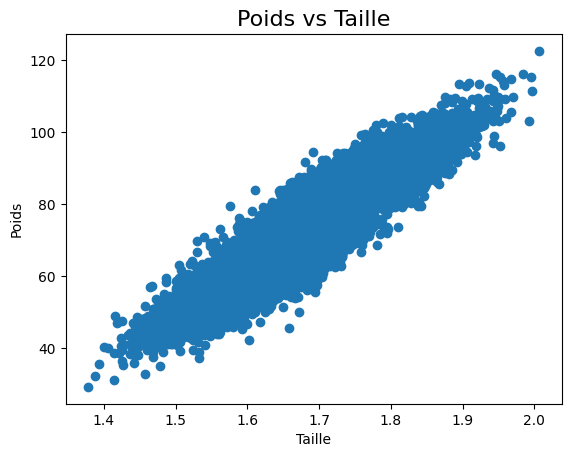

In [40]:
fig=plt.figure()
ax=plt.axes()
x=df['Taille']
y=df['Poids']
plt.scatter(x,y)
ax=ax.set(xlabel='Taille', ylabel='Poids')
plt.title('Poids vs Taille', fontsize=16)

In [45]:
r,p=pearsonr(df['Taille'],df['Poids'])
# Présenter la p-value
print('la p-value est égale à ', p)
if p < 0.05:
    print("Ho est rejetée. Il existe ainsi une relation entre la Taille et le Poids.")
else:
    print("Ho est maintenue.")

la p-value est égale à  0.0
Ho est rejetée. Il existe ainsi une relation entre la Taille et le Poids.
